## Task 2: A spectral solver for the biharmonic equation

Next, following the example of the Poisson solver from the lecture,
we ask you to implement a spectral solver for the biharmonic equation 
supplemented with a $0$-order term in $2d$.

The resulting equation reads
$$
\Delta^2 u  + c u = f \quad \text{in } \Omega,
$$
on a rectangular domain $\Omega = [0,L_x)\times [0,L_y)$, where $\Delta^2$ is the biharmonic operator and $c \geqslant 0$ is a non-negative constant.


The problem is to be solved
on a given rectangular domain $\Omega = [0,L_x) \times [0,L_y) \subset \mathbb{R}^2$ with periodic boundary conditions.
More precisely, we assume that all derivatives up to order 3 are
periodic. 
Different side lengths $L_x$ and $L_y$ are allowed and should be incorporated in the implementation.

Now implement a spectral solver for the biharmonic equation using the fast Fourier transform.
The solver should be implemented in a function of the form


In [ ]:
def biharmonic_solver(X, Y, F, c, mean=0.0):
    """
    Solve the biharmonic equation in 2D using the spectral method.

    Parameters:
        X (ndarray): 2D array of x-coordinates.
        Y (ndarray): 2D array of y-coordinates.
        F (ndarray): 2D array representing the right-hand side of the biharmonic equation.
        c (float): Constant coefficient in the biharmonic equation.
        mean (float, optional): Desired mean value of the solution in case c = 0. Default is 0.0.

    Returns:
        U (ndarray): 2D array representing the solution to the biharmonic equation.
    """
    pass # Add your code here

$$ \mathcal{F}({\nabla^4 u(x,y) + c u(x,y)}) = (k_x^2 + k_y^2)^2 \hat{u}(k_x, k_y) + c \hat{u}(k_x, k_y) = \left((k_x^2 + k_y^2)^2 + c\right) \hat{u}(k_x, k_y)$$

(2000, 1000)


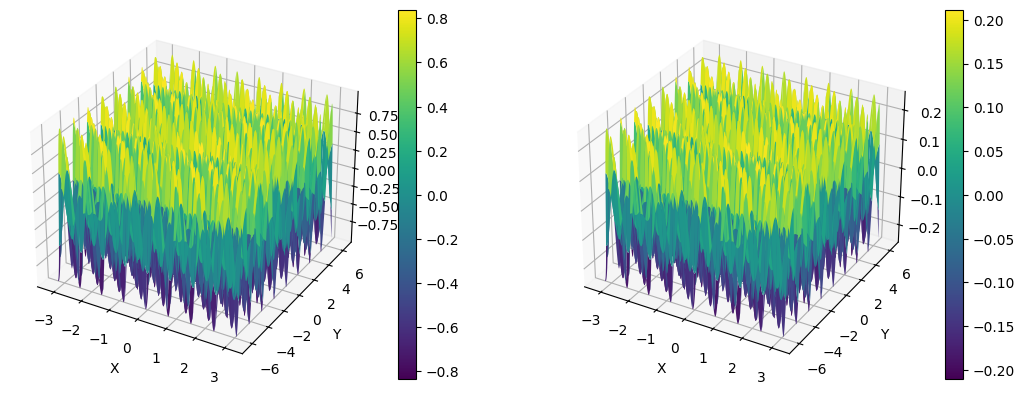

In [1]:
import sympy
from scipy.fft import fft2, ifft2, fft, fftfreq, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff

N_x = 100
N_y = N_x*2
L_x = 2*np.pi
L_y = 4*np.pi
X_points = np.linspace(-L_x/2, L_x/2, N_x, endpoint=False) #Fix boundaries
Y_points = np.linspace(-L_y/2, L_y/2, N_y, endpoint=False)
X, Y = np.meshgrid(X_points,Y_points)

x, y, c = sympy.symbols('x y c')
laplace = lambda u: sympy.diff(u, x, x) + sympy.diff(u, y, y)
c = 1

def u_ex(x, y):
    return np.sin(8*(x-1))*np.cos(4*y)

u = sympy.sin(8*(x-1))*sympy.cos(4*y)
U_ex = u_ex(X, Y)

def f(u):
    return laplace(laplace(u))+c*u

F = f(U_ex)
print(F.shape)
# u = lambda x,y: np.sin(8*(x-1))*np.cos(4*y)
# derivative = 1j*np.stack((KX,KY))

print(U_ex.shape)

def biharmonic_solver(X, Y, F, c, mean=0.0):

    F_hat = fft2(F)
    kx = fftfreq(N_x, d=L_x/N_x)*2*np.pi / L_x
    ky = fftfreq(N_y, d=L_y/N_y)*2*np.pi / L_y
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2 = (KX**2 + KY**2)**2
    K2[0, 0] = 1
    U_hat = F_hat / (c+K2)
    U_hat[0, 0] = 0
    U = ifft2(U_hat).real

    return U


fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X, Y, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X, Y, biharmonic_solver(X, Y, F, c, mean=0.0), cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
plt.show()

(64, 32)
(64, 32)
(64, 32)
(64, 32)
1.3010426069826053e-18
[3165.45171007151, 23.652206487369874, 0.513636364956479, 6.106226635438361e-15, 5.728750807065808e-14, 6.894484982922222e-14, 1.3905543383430086e-14]
EOC between N=4 and N=8: -7.0643
EOC between N=8 and N=15: -6.0923
EOC between N=15 and N=16: -496.8076
EOC between N=16 and N=20: 10.0329
EOC between N=20 and N=32: 0.3941
EOC between N=32 and N=100: -1.4051


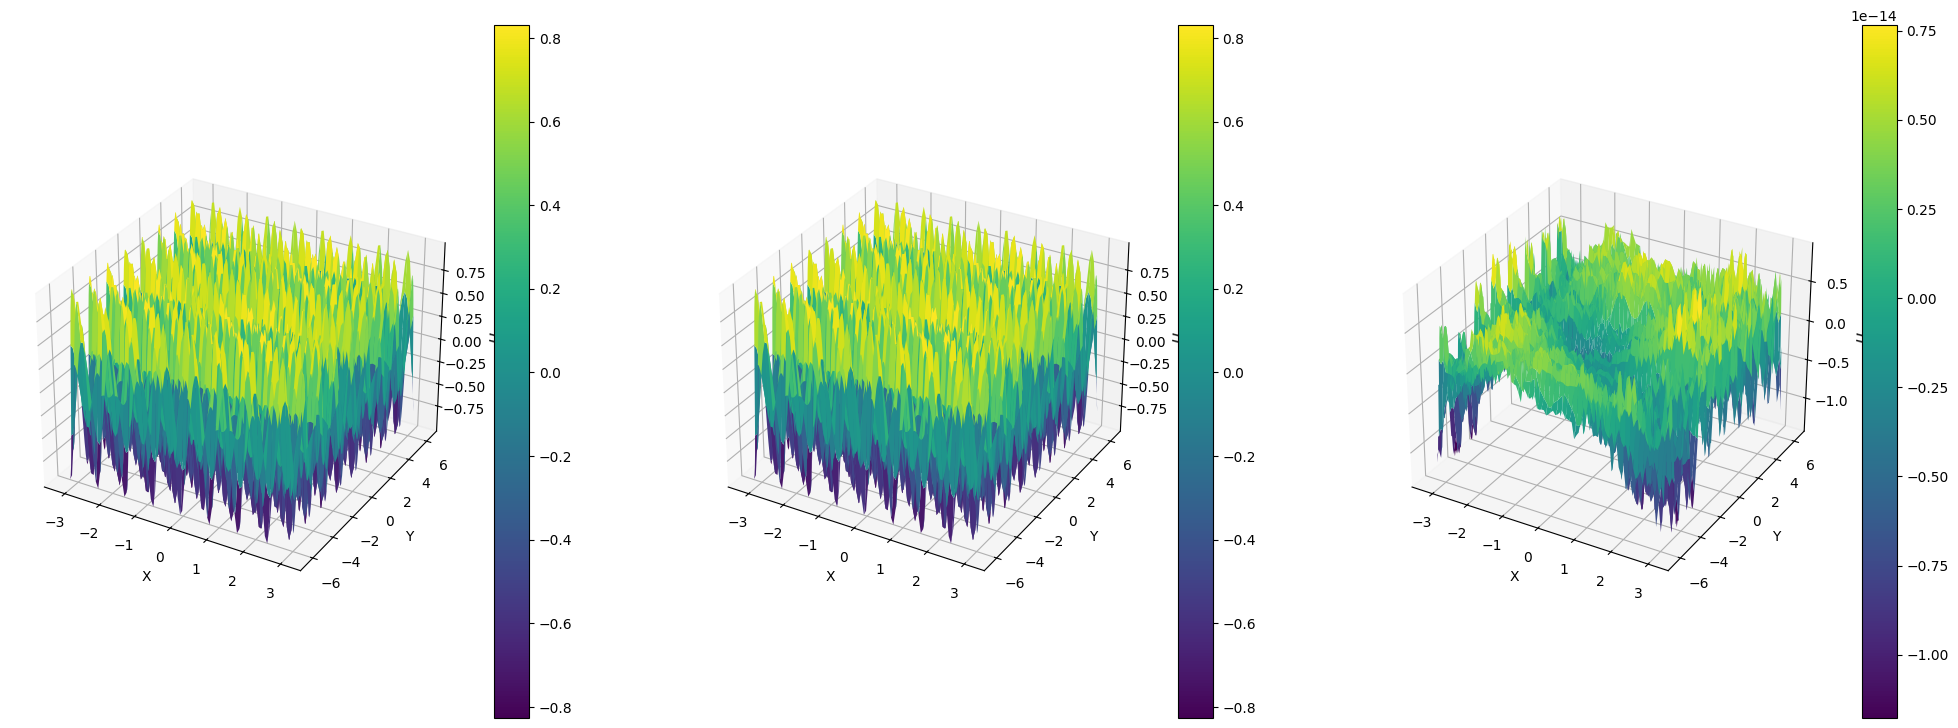

In [12]:
import sympy
from scipy.fft import fft2, ifft2, fft, fftfreq, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff

N_x = 32
N_y = N_x*2
L_x = 2*np.pi
L_y = 4*np.pi
X_points = np.linspace(-L_x/2, L_x/2, N_x, endpoint=False) #Fix boundaries
Y_points = np.linspace(-L_y/2, L_y/2, N_y, endpoint=False)
X, Y = np.meshgrid(X_points,Y_points)

x, y, c = sympy.symbols('x y c')
laplace = lambda u: sympy.diff(u, x, x) + sympy.diff(u, y, y)


def u_ex(x, y):
    return np.sin(8*(x-1))*np.cos(4*y)
    # return np.e**(np.sin(x)**2+np.cos(2*y))

u_symbol = sympy.sin(8*(x-1))*sympy.cos(4*y)
# u_symbol = sympy.exp(sympy.sin(x)**2+sympy.cos(2*y))
f_symbol = laplace(laplace(u_symbol))+c*u_symbol

U_ex = u_ex(X, Y)
# U_ex = u_func(X, Y)

f = sympy.lambdify((x, y, c), f_symbol, modules='numpy')

F = f(X,Y,1)
print(F.shape)
print(X.shape)
print(Y.shape)
print(U_ex.shape)

c=1

def biharmonic_solver(X, Y, F, c, mean=0.0):
    
    F_hat = fft2(F)
    kx = fftfreq(X.shape[1], d=(X[0, 1] - X[0, 0]))*2*np.pi
    ky = fftfreq(Y.shape[0], d=(Y[1, 0] - Y[0, 0]))*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2 = (KX**2 + KY**2)**2
    K2[0, 0] = 1
    U_hat = F_hat / (c+K2)
    if c < 0.0001*np.min(KX)**4:
        U_hat[0, 0] = 0
    U = ifft2(U_hat).real
    if c < 0.0001*np.min(kx)**4:
        # mean = float(input("Enter desired mean:"))
        U -= np.mean(U) - mean

    return U
average = np.average(U_ex)
print(average)


N_values = [4, 8, 15, 16, 20, 32, 100]  # Different grid sizes
errors = []
for N_x in N_values:
    N_y = N_x * 2
    L_x = 2 * np.pi
    L_y = 4 * np.pi
    X_points = np.linspace(-L_x / 2, L_x / 2, N_x, endpoint=False)
    Y_points = np.linspace(-L_y / 2, L_y / 2, N_y, endpoint=False)
    X, Y = np.meshgrid(X_points, Y_points)
    F= f(X,Y,1)
    U_num = biharmonic_solver(X, Y, F, c=1, mean=average)
    U_ex = u_ex(X, Y)
    error = np.max(np.abs(U_num - U_ex))
    errors.append(error)




print(errors)
EOC = []
for i in range(1, len(errors)):
    eoc = np.log(errors[i-1] / errors[i]) / np.log(N_values[i-1] / N_values[i])
    EOC.append(eoc)

for i in range(len(EOC)):
    print(f"EOC between N={N_values[i]} and N={N_values[i+1]}: {EOC[i]:.4f}")



fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X, Y, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X, Y, biharmonic_solver(X, Y, F, c, mean=average), cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')



ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X, Y, biharmonic_solver(X, Y, F, c, mean=average)-U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
plt.show()

# plt.figure()
# plt.loglog(N_values[1:], errors[1:], marker='o', label='Error')
# plt.xlabel('Grid Size (N)')
# plt.ylabel('Max Norm of Error')
# plt.title('Convergence Study')
# plt.grid()
# plt.legend()
# plt.show()

In [256]:
print(np.e)

2.718281828459045


2.219904279678466
[10.612759356244538, 0.9843260583514946, 0.0346252135236762, 0.000992931037904654, 1.5070640202452523e-06, 6.313802103363741e-08, 2.5305695317001664e-09, 9.627232344655567e-11]
EOC between N=8 and N=12: 5.8645
EOC between N=12 and N=16: 11.6357
EOC between N=16 and N=20: 15.9166
EOC between N=20 and N=28: 19.2898
EOC between N=28 and N=32: 23.7592
EOC between N=32 and N=36: 27.3119
EOC between N=36 and N=40: 31.0270
[[2.71828183 2.82373431 3.14699053 ... 3.70120441 3.14699053 2.82373431]
 [2.51904417 2.61676747 2.91633048 ... 3.42992302 2.91633048 2.61676747]
 [2.02811498 2.10679327 2.34797532 ... 2.7614753  2.34797532 2.10679327]
 ...
 [1.4662138  1.52309381 1.69745495 ... 1.99639233 1.69745495 1.52309381]
 [2.02811498 2.10679327 2.34797532 ... 2.7614753  2.34797532 2.10679327]
 [2.51904417 2.61676747 2.91633048 ... 3.42992302 2.91633048 2.61676747]]


Text(0.5, 0, 'Error function')

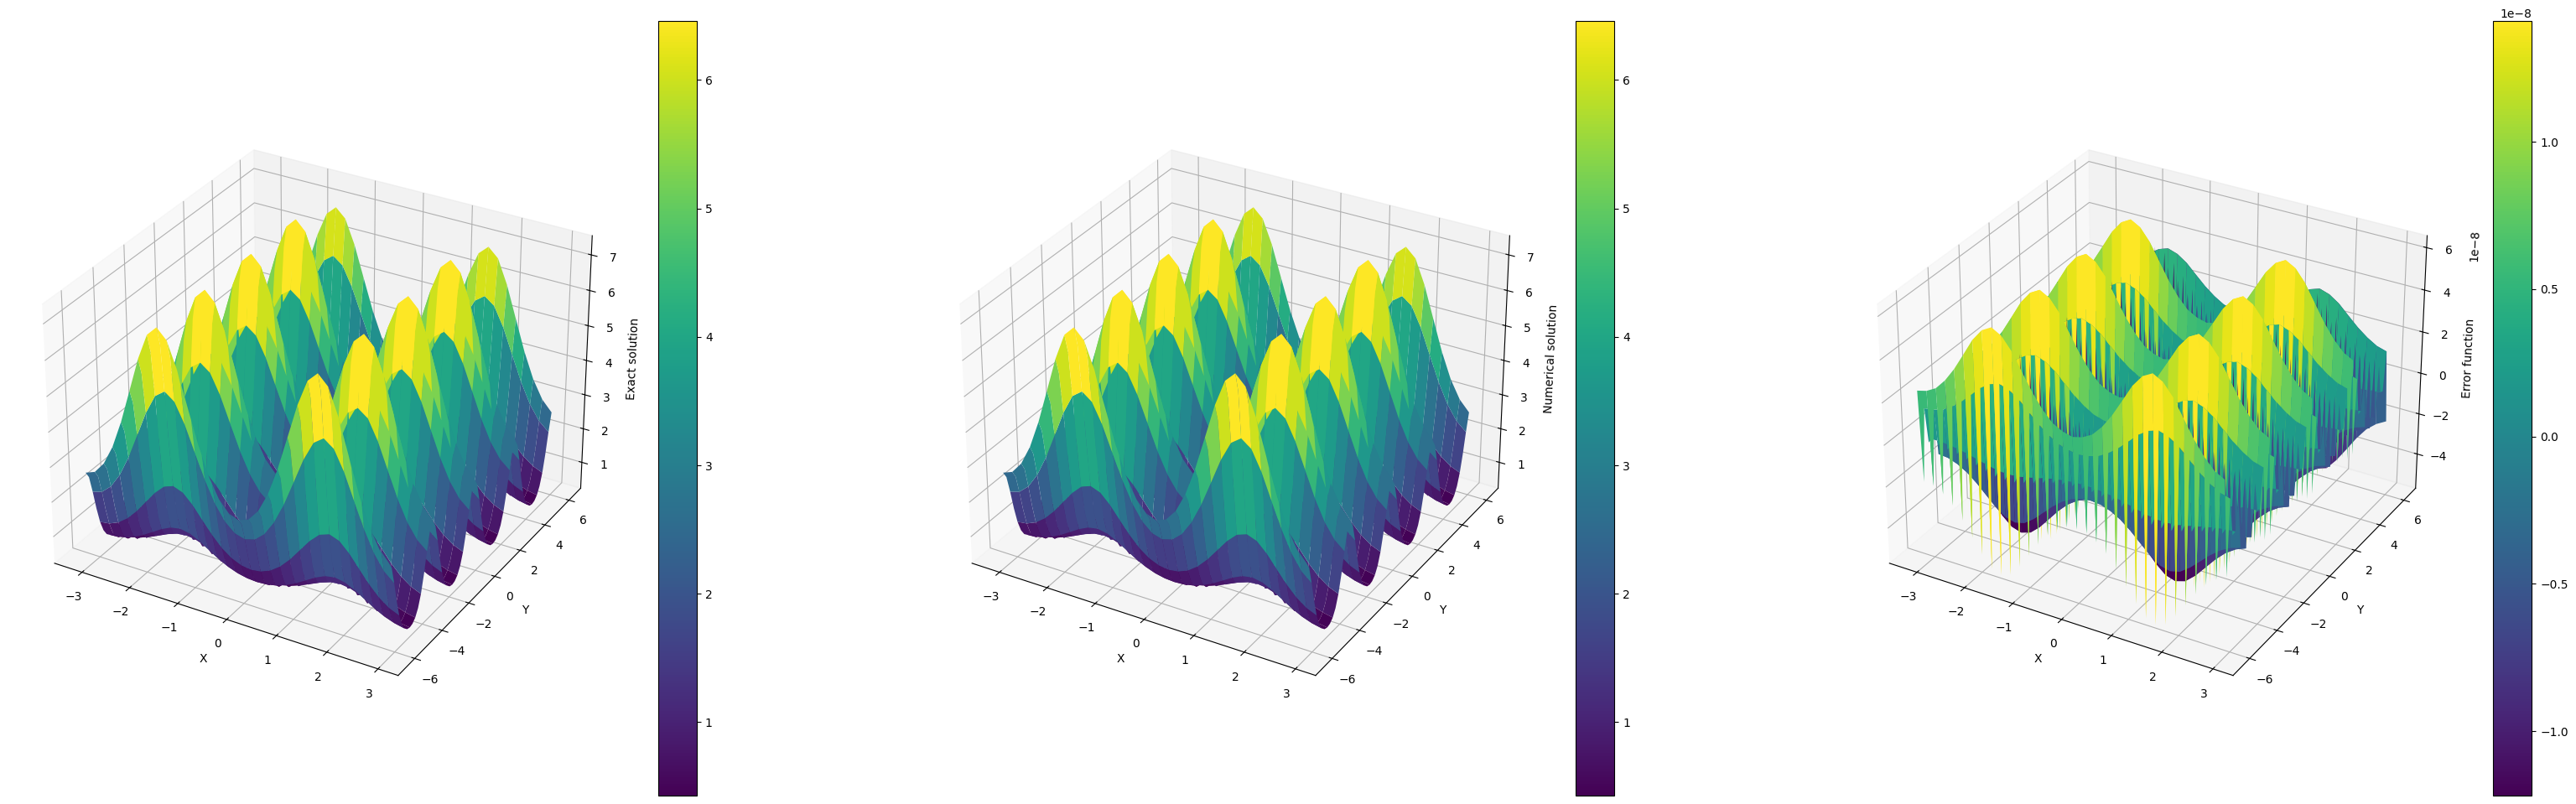

In [10]:
import sympy
from scipy.fft import fft2, ifft2, fft, fftfreq, fftshift, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff

N_x = 32
N_y = N_x*2
L_x = 2*np.pi
L_y = 4*np.pi
X_points = np.linspace(-L_x/2, L_x/2, N_x, endpoint=False) #Fix boundaries
Y_points = np.linspace(-L_y/2, L_y/2, N_y, endpoint=False)
X, Y = np.meshgrid(X_points,Y_points)

x, y = sympy.symbols('x y')
laplace = lambda u: sympy.diff(u, x, x) + sympy.diff(u, y, y)


def u_ex(x, y):
    return np.e**(np.sin(x)**2+np.cos(2*y))

u_symbol = sympy.exp(sympy.sin(x)**2+sympy.cos(2*y))
f_symbol = laplace(laplace(u_symbol))

U_ex = u_ex(X, Y)
average = np.average(U_ex)
print(average)


f = sympy.lambdify((x, y), f_symbol, modules='numpy')

c=0

def biharmonic_solver(X, Y, F, c, mean=0.0):
    
    F_hat = fft2(F)
    kx = fftfreq(X.shape[1], d=(X[0, 1] - X[0, 0]))*2*np.pi
    ky = fftfreq(Y.shape[0], d=(Y[1, 0] - Y[0, 0]))*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2 = (KX**2 + KY**2)**2
    K2[0, 0] = 1
    U_hat = F_hat / (c+K2)
    if c == 0:
        U_hat[0, 0] = 0
    U = ifft2(U_hat).real
    if c == 0:
        U -= np.mean(U) - mean

    return U


N_values = [8, 12, 16, 20, 28, 32, 36, 40]  # Different grid sizes
errors = []
for N_x in N_values:
    N_y = N_x * 2
    L_x = 2 * np.pi
    L_y = 4 * np.pi
    X_points = np.linspace(-L_x / 2, L_x / 2, N_x, endpoint=False)
    Y_points = np.linspace(-L_y / 2, L_y / 2, N_y, endpoint=False)
    X, Y = np.meshgrid(X_points, Y_points)
    F= f(X,Y)
    U_num = biharmonic_solver(X, Y, F, c=0, mean=average)
    U_ex = u_ex(X, Y)
    error = np.max(np.abs(U_num - U_ex))
    errors.append(error)


print(errors)
EOC = []
for i in range(1, len(errors)):
    eoc = np.log(errors[i-1] / errors[i]) / np.log(N_values[i] / N_values[i-1])
    EOC.append(eoc)

for i in range(len(EOC)):
    print(f"EOC between N={N_values[i]} and N={N_values[i+1]}: {EOC[i]:.4f}")

N_x = 32
N_y = N_x*2
L_x = 2*np.pi
L_y = 4*np.pi
X_points = np.linspace(-L_x/2, L_x/2, N_x, endpoint=False) #Fix boundaries
Y_points = np.linspace(-L_y/2, L_y/2, N_y, endpoint=False)
X1, Y1 = np.meshgrid(X_points,Y_points)
U_ex = u_ex(X1, Y1)
F= f(X1,Y1)
print(U_ex)

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X1, Y1, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'Exact solution')


ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X1, Y1, biharmonic_solver(X1, Y1, F, c, mean=average), cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'Numerical solution')


ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X1, Y1, biharmonic_solver(X1, Y1, F, c, mean=average)-U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'Error function')



Your solver should also be able to gracefully handle the case $c=0$ by prescribing a (user-defined) mean value for
the solution. This will come in handy when you are asked to test your solver using manufactured solutions which do not necessarily have a 0 mean value.

To verify the correctness of your implementation, run a number convergence studies using the **manufactured solutions**
from the following 2 test cases, each of them posed on the rectangular domain $\Omega = [0,2\pi) \times [0,4\pi)$:

* $u(x,y) = \sin(8(x-1))\cos(4y)$, $c=1$, and $N_x = 4, 8, 15, 16, 20, 32$ and $N_y = 2N_x$.
* $u(x,y) =  \exp(\sin^2(x) + \cos(2y))$, $c=0$, $N_x = 4 + 4k$, $k=0,1\ldots,9$ and $N_y = 2N_x$.

Remember to compute the corresponding right-hand side $f$ for the manufactured solutions.
For each series, compute the experimental order of convergence (EOC) with respect to the maximum norm over the grid points
report them in a table.

Provide also a surface plot of both the exact solution, the numerical solution and the error function for $N_x = 15, 16$ in the first series and $N_x = 32$ in the second series.

Discuss the results.

**Hints:** 

* To compute the right-hand side $f$ for the manufactured solutions, it might be helpful to start using the ```sympy``` module, see lecture notes and the tutorial.
This will definitely pay-off later when you are asked to manufacture solution for the Cahn-Hilliard equation!

* Recall that numerically the check $c=0$ is not trivial. As a rule of thumb, you can check e.g. whether $c$ is smaller 
the smallest non-zero **quartic** frequency in the Fourier space, i.e., $c < \mathrm{tol} \cdot k_{\text{min}}^4$, where 
$k_{\text{min}}$ is the smallest non-zero frequency in the Fourier space.